### EDA
Vamos a realizar un analisis de los datos contenidos en los dataframes

In [50]:
# importamos librerias
import pandas as pd
import seaborn as sns
import gzip
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
steam = pd.read_csv('steam.csv')
reviews = pd.read_csv('reviews.csv')
items = pd.read_csv('items.csv')

In [23]:
items.head(1)

,Unnamed: 0,user_id,items_count,item_id,item_name,playtime_forever
0,0,76561197970982479,277,10,Counter-Strike,6.0


In [22]:
reviews.head(1)

,user_id,posted,item_id,recommend,sentiment_analysis
0,76561197970982479,2011-11-05,1250,True,2


In [3]:
steam.head(1)

,Unnamed: 0,genres,app_name,title,early_access,id,release_year
0,0,Action,Lost Summoner Kitty,Lost Summoner Kitty,0.0,761140,2018


In [11]:
steam = steam.drop(columns='Unnamed: 0', axis=1)

Veamos la distribucion por cantidad de generos de juegos

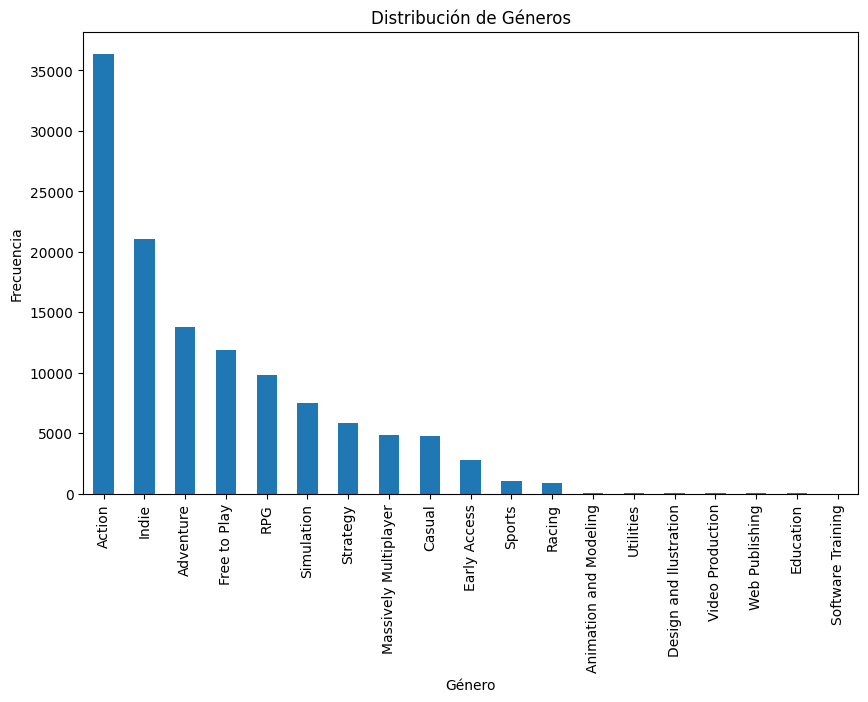

In [12]:
#Distribución de géneros
import matplotlib.pyplot as plt
# Convierte la lista de géneros en columnas individuales
generos = steam['genres']

# Calcula la frecuencia de cada género
genre_counts = generos.value_counts()

# Visualiza la distribución de géneros con un gráfico de barras
genre_counts.plot(kind='bar', figsize=(10, 6), title='Distribución de Géneros')
plt.xlabel('Género')
plt.ylabel('Frecuencia')
plt.show()

In [13]:
reviews.head()

,user_id,posted,item_id,recommend,sentiment_analysis
0,76561197970982479,2011-11-05,1250,True,2
1,76561197970982479,2011-07-15,22200,True,2
2,76561197970982479,2011-04-21,43110,True,2
3,js41637,2014-06-24,251610,True,2
4,js41637,2013-09-08,227300,True,2


Veamos la distribucion segun el sentimiento siendo 0 negativo , 1 neutral, 2 positivo

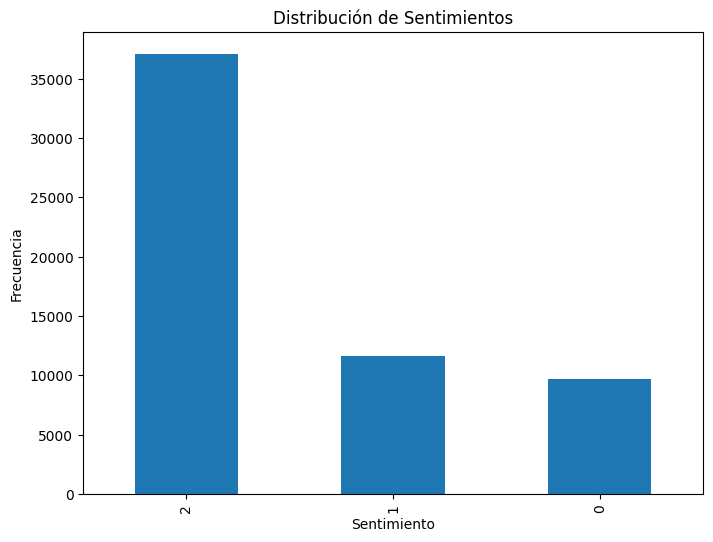

In [14]:
# Cuenta la frecuencia de cada etiqueta de sentimiento
sentiment_counts = reviews['sentiment_analysis'].value_counts()

# Crea un gráfico de barras para visualizar la distribución de sentimientos
sentiment_counts.plot(kind='bar', figsize=(8, 6))
plt.title('Distribución de Sentimientos')
plt.xlabel('Sentimiento')
plt.ylabel('Frecuencia')
plt.show()

Veamos una nuve de palabra con los principales generos

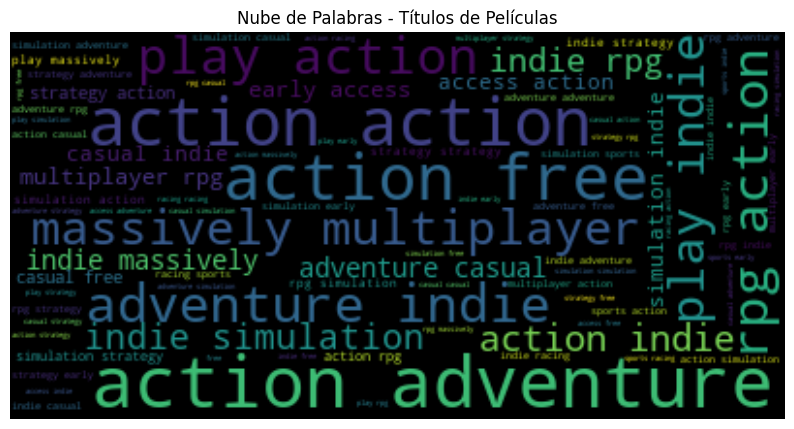

In [24]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

title_words = ' '.join(steam['genres'])
title_words = title_words.lower()

# Sacamos algunas palabras que no aportan
stopwords = ['de', 'it', 'be', 'who', 'ii', 'le', 'no', "to", "of", "the", "and", "&", ":", "in", "for", "on", "a", "by", "with", "an", "into", "from", 'i', 'not', 'that', 'is', 'me', 'my', 'you', 'what']

# Configurar la nube de palabras
wordcloud = WordCloud(stopwords=stopwords, background_color='black', colormap='viridis', contour_width=0.5, contour_color='white').generate(title_words)

# Configurar la figura
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de Palabras - Títulos de Películas', color='black')  # Cambiar el color del título
plt.show()

### Sistema de recomendacion
Para realizar la funcion de recomendacion utlizaremos la similitud del coseno, esta ulitiza para calcular la similitud las descripciones de los juegos. Esto se logra comparando los vectores de frecuencia de palabras de los juegos. Cuanto más cercano a 1 es el valor del coseno, más similar es la descripción de dos juegos. Dicha descripcion sera la columna de generos que contiene cada juego.

Preparamos el dataframe para que consuma los datos la funcion

In [55]:
sreco= sreco.drop(columns='Unnamed: 0',axis=1)

In [48]:
sreco = pd.read_csv('recomendacion.csv')

In [56]:
sreco.head(2)

,item_id,title,description
0,761140,Lost Summoner Kitty,"Action, Casual, Indie, Simulation, Strategy, S..."
1,643980,Ironbound,"Free to Play, Indie, RPG, Strategy, Free to Pl..."


In [51]:

# Instanciamos la clase CountVectorizer
vector = CountVectorizer(tokenizer= lambda x: x.split(', '))

matriz_descripcion = vector.fit_transform(sreco['description'])


def recomendacion_juego(id_producto: int):
    '''
    def recomendacion_juego( id de producto ): Ingresando el id de producto, deberíamos recibir una lista con 5 juegos recomendados similares al ingresado
    
    '''
    # Si el id ingresado no se encuentra en la columna de id de la tabla 'sreco' se le pide al usuario que intente con otro id
    if id_producto not in sreco['item_id'].values:
        return 'El ID no existe, intente con otro'
    else:
        # buscamos el índice del id ingresado
        index = sreco.index[sreco['item_id']==id_producto][0]

        # De la matriz de conteo, tomamos el array de descripciones con índice igual a 'index'
        description_index = matriz_descripcion[index]

        # Calculamos la similitud coseno entre la descripción de entrada y la descripción de las demás filas: cosine_similarity(description_index, matriz_descripcion)
        # Obtenemos los índices de las mayores similitudes mediante el método argsort() y las similitudes ordenadas de manera descendente
        # Tomamos los índices del 1 al 6 [0, 1:6] ya que el índice 0 es el mismo índice de entrada
        indices_maximos = np.argsort(-cosine_similarity(description_index, matriz_descripcion))[0, 1:6]

        # Construimos la lista
        recomendaciones = []
        for i in indices_maximos:
            recomendaciones.append(sreco['title'][i])
        
        return recomendaciones


c:\Users\PABLO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [52]:
recomendacion_juego(10)

['Counter-Strike: Condition Zero',
 'Counter-Strike: Source',
 'Day of Defeat',
 'Counter-Strike: Global Offensive',
 'Half-Life Deathmatch: Source']